# Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/20222/data vizualize/air/data.csv')

In [ ]:
from sklearn.model_selection import train_test_split
y_origin = df["price"].values
x_origin = df.drop("price", axis=1).values
X_train, X_test, Y_train, Y_test = train_test_split(x_origin, y_origin, test_size = 0.2, random_state=3)

In [ ]:
system_cols = [col for col in df.columns if col.startswith('SYSTEM_')]
df[system_cols] = df[system_cols].fillna(value=0)

In [ ]:
df['canInstantBook'] = df['canInstantBook'].fillna(value=0)

In [ ]:
missing_value = df.isnull().sum()
missing_value[:20]

Unnamed: 0                 0
rating                     0
isSuperHost                0
isVerified                 0
reviewCount                0
yearHosting                0
contextualPicturesCount    0
lat                        0
long                       0
canInstantBook             0
price                      0
maxGuestCapacity           0
SYSTEM_VIEW_OCEAN          0
SYSTEM_BEACH               0
SYSTEM_COOKING_BASICS      0
SYSTEM_WI_FI               0
SYSTEM_WORKSPACE           0
SYSTEM_MAPS_CAR_RENTAL     0
SYSTEM_POOL                0
SYSTEM_NO_DETECTOR_CO2     0
dtype: int64

In [ ]:
# Convert 'maxGuestCapacity' column to numeric type
df['maxGuestCapacity'] = pd.to_numeric(df['maxGuestCapacity'], errors='coerce')

# Calculate the mean of non-NaN values in 'maxGuestCapacity' column
column_mean = df['maxGuestCapacity'].mean()

# Fill NaN values in 'maxGuestCapacity' column with the mean
df['maxGuestCapacity'].fillna(round(column_mean), inplace=True)

In [ ]:
df = df.drop(['room_id'], axis=1)

In [ ]:
df

,Unnamed: 0,rating,isSuperHost,isVerified,reviewCount,yearHosting,contextualPicturesCount,lat,long,canInstantBook,...,SYSTEM_CABLE,SYSTEM_PIANO,SYSTEM_CRIB,SYSTEM_VIDEO_GAME,SYSTEM_SPEAKERS,SYSTEM_BABY_BATH,SYSTEM_PACK_N_PLAY,SYSTEM_MAPS_BAR,SYSTEM_RECORD_PLAYER,SYSTEM_DESERT_CACTUS
0,0,5.0,0.0,0.0,7,0.0,30,20.953170,107.012230,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0,0.0,25,20.953727,107.012827,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0,0.0,20,20.956402,107.016566,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,5.0,0.0,0.0,4,0.0,22,20.951050,107.070736,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0,0.0,30,20.954072,107.004809,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47948,1,0.0,0.0,0.0,0,0.0,30,10.790360,106.752370,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47949,2,0.0,0.0,0.0,0,0.0,30,10.791350,106.752270,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47950,3,0.0,0.0,0.0,0,0.0,5,10.835980,106.764900,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47951,4,0.0,0.0,0.0,0,0.0,12,10.810096,106.750866,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model = LinearRegression()

model.fit(X_train, Y_train)

y_train_pred = model.predict(X_test)

r2 = r2_score(Y_test, y_train_pred)

accuracy = r2 * 100
print("Accuracy:", accuracy, "%")


Accuracy: 71.1774776222674 %


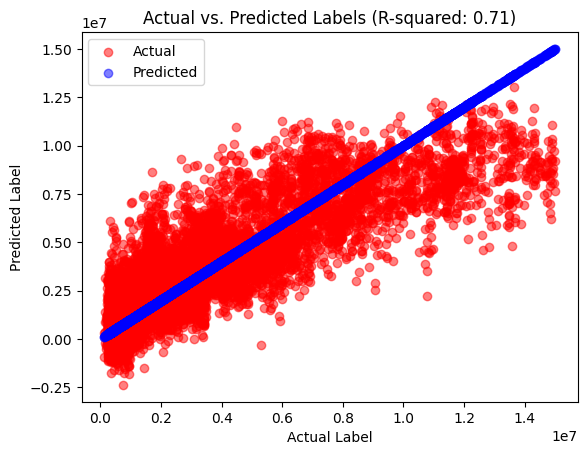

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, Y_train)
y_test_pred = model.predict(X_test)

# Calculate R-squared score
r2 = r2_score(Y_test, y_test_pred)

# Plot the scatter plot
plt.scatter(Y_test, y_test_pred, color='red', alpha=0.5, label='Actual')
plt.scatter(Y_test, Y_test, color='blue', alpha=0.5, label='Predicted')
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.title("Actual vs. Predicted Labels (R-squared: {:.2f})".format(r2))
plt.legend()
plt.show()
